In [8]:
pip install geopandas contextily


  Obtaining dependency information for contextily from https://files.pythonhosted.org/packages/fb/46/07a029b73f9a5c7bbf9b538e6441c42014a448f335a1cc780616f2594bad/contextily-1.6.2-py3-none-any.whl.metadata
  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for mercantile from https://files.pythonhosted.org/packages/b2/d6/de0cc74f8d36976aeca0dd2e9cbf711882ff8e177495115fd82459afdc4d/mercantile-1.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for rasterio from https://files.pythonhosted.org/packages/fc/b9/78aedee3aa850424037aa21da482fd659200039d16e7407ffe25e07548b5/rasterio-1.4.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for geographiclib<3,>=1.52 from https://files.pythonhosted.org/packages/9f/5a/a26132406f1f40cf51ea349a5f11b0a46cec02a2031ff82e391c2537247a/geographic

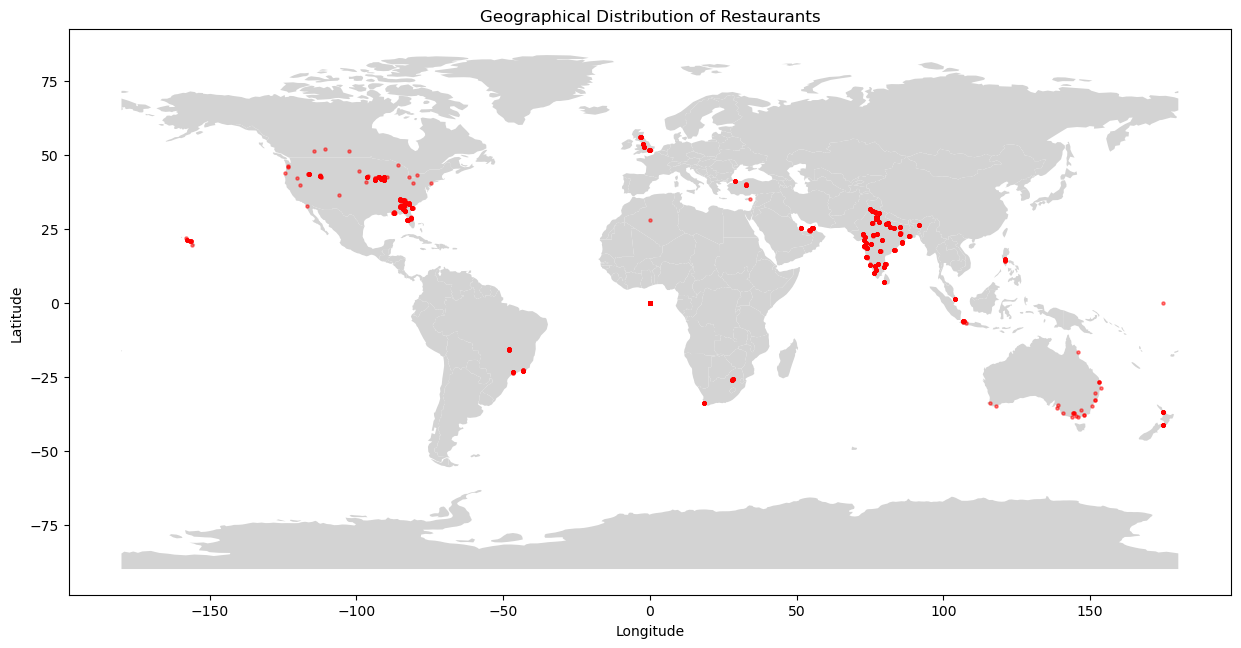

In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load your dataset 
df = pd.read_csv("C:/Users/DynaBook/Downloads/archive (11)/zomato.csv",encoding="ISO-8859-1")

# Filter for the necessary columns
df_filtered = df[['Restaurant ID', 'Restaurant Name', 'City', 'Latitude', 'Longitude']].dropna()

# Create a GeoDataFrame from the latitude and longitude columns
gdf = gpd.GeoDataFrame(df_filtered, geometry=gpd.points_from_xy(df_filtered['Longitude'], df_filtered['Latitude']))

# Set the coordinate reference system (CRS) to WGS84 (EPSG:4326), which is commonly used for GPS coordinates
gdf.set_crs(epsg=4326, inplace=True)

# Load the Natural Earth dataset (replace with the path to the .shp file)
world = gpd.read_file("C:/Users/DynaBook/Downloads/ne_110m_admin_0_countries")

# Plot the world map
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgray')

# Plot the restaurants on top of the world map
gdf.plot(ax=ax, color='red', markersize=5, alpha=0.5)

# Set the plot title and labels
plt.title("Geographical Distribution of Restaurants")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()



Mean Squared Error: 0.09185501569320763
R^2 Score: 0.9598892034585754


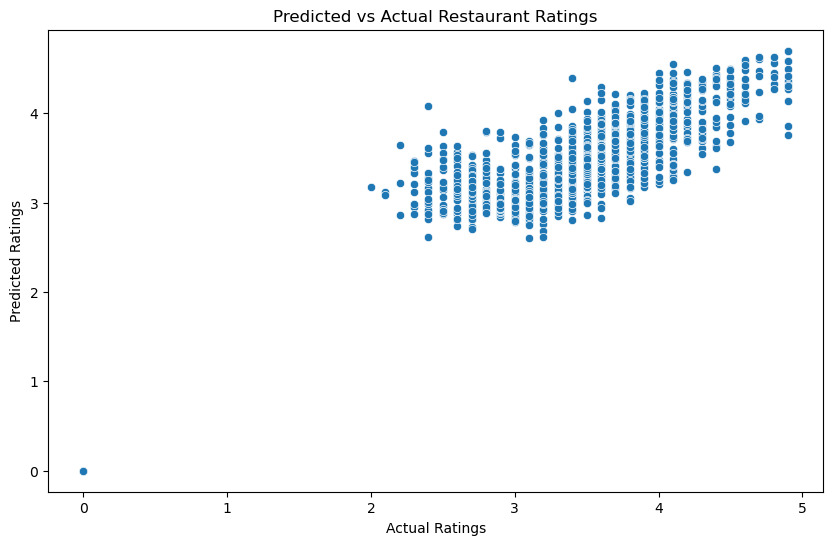

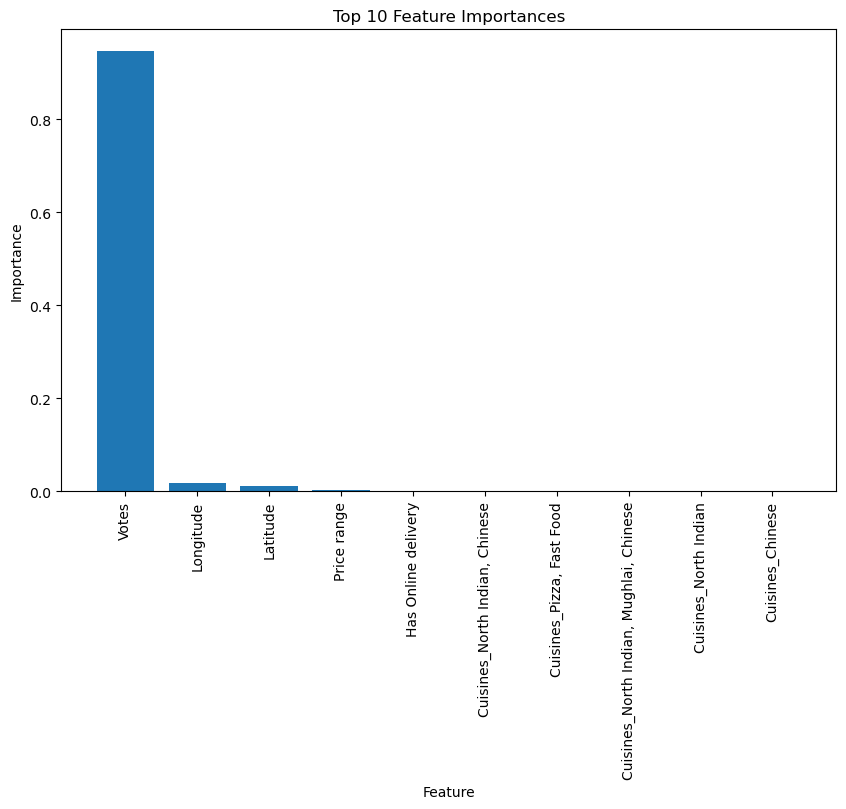

In [8]:
# Step 1: Load the dataset
df = pd.read_csv("C:/Users/DynaBook/Downloads/archive (11)/zomato.csv",encoding="ISO-8859-1")  # Replace with your actual dataset path

# Step 2: Data Preprocessing
# Filter out rows with missing values in both features and target
df = df.dropna(subset=['Aggregate rating', 'Latitude', 'Longitude', 'Cuisines', 'Price range', 'Votes'])

# Step 3: Feature Selection
# Selecting the features that may influence the restaurant ratings
features = ['Latitude', 'Longitude', 'Cuisines', 'Price range', 'Has Online delivery', 'Votes']

# Prepare the target variable (what we're predicting)
target = 'Aggregate rating'

# Step 4: Encoding categorical variables (e.g., Cuisines and Yes/No columns)
# OneHotEncode the 'Cuisines' feature
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_cuisines = encoder.fit_transform(df[['Cuisines']]).toarray()

# Encode 'Has Online delivery' column (Yes/No to 1/0)
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

# Step 5: Combine encoded features with other numerical features
df_encoded = pd.DataFrame(encoded_cuisines, columns=encoder.get_feature_names_out(['Cuisines']))
df_features = pd.concat([df[features].drop('Cuisines', axis=1).reset_index(drop=True), df_encoded], axis=1)

# Ensure that the feature matrix and target variable have the same number of rows
assert len(df_features) == len(df[target]), "Mismatch in the number of rows between features and target"

# Step 6: Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_features, df[target].reset_index(drop=True), test_size=0.2, random_state=42)

# Step 7: Feature Scaling (standardize features like latitude, longitude, and votes)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 8: Model Training (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Step 9: Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Step 10: Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Step 11: Optional - Visualize Predicted vs Actual Ratings
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Predicted vs Actual Restaurant Ratings')
plt.show()


# Get feature importances from the model
importances = model.feature_importances_

# Sort the feature importances in descending order and get indices
indices = np.argsort(importances)[::-1]

# Select the top 10 important features
top_n = 10
top_indices = indices[:top_n]

# Plot the top 10 important features
plt.figure(figsize=(10,6))
plt.title(f"Top {top_n} Feature Importances")
plt.bar(range(top_n), importances[top_indices], align="center")
plt.xticks(range(top_n), X_train.columns[top_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()
